# Data exploration & preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import (make_scorer, mean_squared_error, r2_score,
                             root_mean_squared_error)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("./datasets/used_cars_UK.csv")
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [3]:
# display basic info (num of entries, columns etc.) about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB


In [4]:
df.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [5]:
df.rename(
    columns={
        "Price": "price",
        "Mileage(miles)": "mileage",
        "Registration_Year": "registration_year",
        "Previous Owners": "previous_owners",
        "Fuel type": "fuel_type",
        "Body type": "body_type",
        "Engine": "engine",
        "Gearbox": "gearbox",
        "Doors": "doors",
        "Seats": "seats",
        "Emission Class": "emission_class",
        "Service history": "service_history",
    },
    inplace=True
)

In [6]:
df.drop(columns=["Unnamed: 0", "title"], inplace=True)

In [7]:
# display names of the columns
df.columns

Index(['price', 'mileage', 'registration_year', 'previous_owners', 'fuel_type',
       'body_type', 'engine', 'gearbox', 'doors', 'seats', 'emission_class',
       'service_history'],
      dtype='object')

## Duplicates check

In [8]:
df.shape

(3685, 12)

In [9]:
duplicates = df[df.duplicated()]
print(f"{len(duplicates)} out of {len(df)} rows are duplicated")

826 out of 3685 rows are duplicated


In [10]:
df.drop_duplicates()

,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3680,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3681,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3682,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3683,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


## Unique values for nominal/categorical data

In [11]:
df.dtypes

price                  int64
mileage                int64
registration_year      int64
previous_owners      float64
fuel_type             object
body_type             object
engine                object
gearbox               object
doors                float64
seats                float64
emission_class        object
service_history       object
dtype: object

In [12]:
for i, dtype in zip(df.dtypes.index, df.dtypes.values):
    if dtype == "object":
        print(i, df[i].unique())
        print("---")

fuel_type ['Diesel' 'Petrol' 'Petrol Plug-in Hybrid' 'Petrol Hybrid' 'Electric'
 'Diesel Hybrid']
---
body_type ['Hatchback' 'Coupe' 'Estate' 'Saloon' 'Convertible' 'MPV' 'SUV' 'Minibus'
 'Combi Van' 'Pickup']
---
engine ['1.4L' '1.2L' '1.3L' '2.0L' '1.6L' '2.3L' '1.8L' '1.0L' '3.0L' '1.5L'
 '1.9L' '2.4L' '2.2L' '3.5L' '3.2L' '2.5L' '1.1L' '3.1L' '3.7L' '2.6L'
 '2.1L' '2.8L' '5.0L' '0.8L' '2.7L' '1.7L' '0.9L' '4.2L' nan '4.4L' '4.3L'
 '3.3L' '5.5L' '4.8L' '6.3L']
---
gearbox ['Manual' 'Automatic']
---
emission_class ['Euro 6' 'Euro 4' 'Euro 5' nan 'Euro 3' 'Euro 2' 'Euro 1']
---
service_history [nan 'Full']
---


## Handle missing values

### Categorical variables

In [13]:
df['engine'] = df['engine'].str.replace('L', '', regex=False).astype(float)
df['engine'].fillna(df.engine.mean(), inplace=True)
df['emission_class'] = df['emission_class'].fillna('Unknown')
df['service_history'] = df['service_history'].fillna("Unknown")

/var/folders/zz/r2b7n9cx4bx877cfdr2k98nw0000gn/T/ipykernel_8736/4261156369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df.engine.mean(), inplace=True)


### Interval/ratio variables

In [14]:
df.fillna(
    {
        "mileage": df["mileage"].median(),
        "registration_year": df["registration_year"].median(),
        "previous_owners": df["previous_owners"].median(),
        "engine": df["engine"].median(),
        "doors": df["doors"].median(),
        "seats": df["seats"].median(),
    },
    inplace=True,
)

## One-hot encoding for categorical/nominal values

In [15]:
print("Categorical values:", df.select_dtypes(include='object').columns.tolist())

Categorical values: ['fuel_type', 'body_type', 'gearbox', 'emission_class', 'service_history']


In [16]:
df = pd.get_dummies(df, ['fuel_type', 'body_type', 'gearbox', 'emission_class', 'service_history'])

In [17]:
df.head()

,price,mileage,registration_year,previous_owners,engine,doors,seats,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,...,gearbox_Manual,emission_class_Euro 1,emission_class_Euro 2,emission_class_Euro 3,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,emission_class_Unknown,service_history_Full,service_history_Unknown
0,6900,70189,2016,3.0,1.4,5.0,5.0,True,False,False,...,True,False,False,False,False,False,True,False,False,True
1,1495,88585,2008,4.0,1.2,3.0,5.0,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,949,137000,2011,3.0,1.4,5.0,5.0,False,False,False,...,True,False,False,False,False,True,False,False,False,True
3,2395,96731,2010,5.0,1.4,3.0,4.0,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,1000,85000,2013,3.0,1.3,5.0,5.0,True,False,False,...,True,False,False,False,False,True,False,False,False,True


# Scale (numerical) data

In [18]:
# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [19]:
# Scale the numerical data
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

In [20]:
# Combine scaled numerical data with one-hot encoded categorical data
processed_df = pd.concat([scaled_numerical_df, df[categorical_columns].reset_index(drop=True)], axis=1)
processed_df_np = processed_df.values

# Split into train & test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    processed_df.drop('price', axis=1).values,
    df['price'].values,
    test_size=0.2,
    random_state=42
)

# Lasso regression

In [22]:
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 100],  # Range of alpha values
    'max_iter': [1000, 5000, 10000],          # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2]                # Tolerance for optimization
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

/Users/sudoleg/anaconda3/envs/ML_github/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.128e+08, tolerance: 4.656e+06
  model = cd_fast.enet_coordinate_descent(
/Users/sudoleg/anaconda3/envs/ML_github/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.469e+08, tolerance: 4.730e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sudoleg/anaconda3/envs/ML_github/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Best Parameters: {'alpha': 4, 'max_iter': 1000, 'tol': 0.01}


## Evaluation

In [23]:
# calculate R2-score
y_test_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("RMSE:", round(rmse, 2))
print("R-squared (R2):", round(r2, 2))

RMSE: 2277.7
R-squared (R2): 0.76


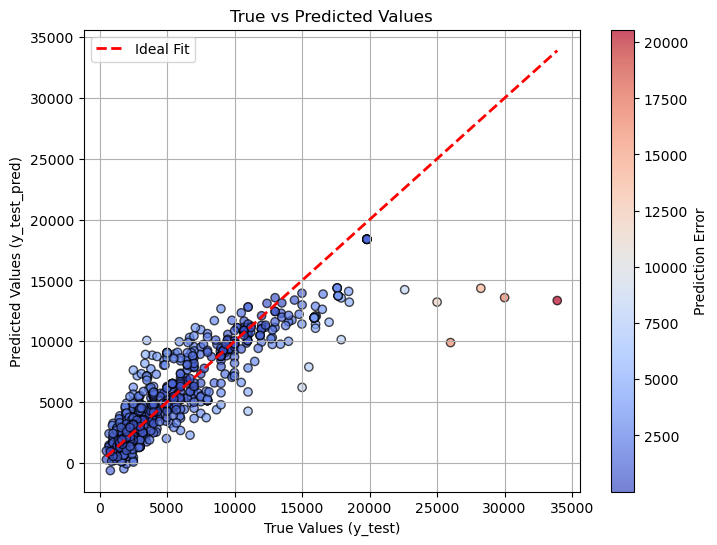

In [24]:
plt.figure(figsize=(8, 6))
errors = np.abs(y_test - y_test_pred)  # Absolute errors

# Scatter plot with color-coded errors
scatter = plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Prediction Error')

# Ideal diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Ideal Fit')

# Add labels and legend
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()